In [2]:
from shifter import *

In [3]:
def show(elements, transpose=False, big=False, save=False, n=None):
    if big:
        plt.figure(figsize=(20,10))
    else:
        plt.figure()
    if transpose:
        plt.imshow(elements.transpose())
    else:
        plt.axis('off')
        plt.imshow(elements)
    plt.colorbar()
    plt.grid(b=None)
    if save:
        num = str(n)
#         plt.savefig('blocks_saved/'+num+'.png')
    else:
        plt.show(block=False)

In [4]:
W_h = np.load('connHist.npy')

In [5]:
W_h.shape

(20000, 54, 54)

In [6]:
for i in [0,1000,9000,-1]:
    plot_W(W_h[i],i)

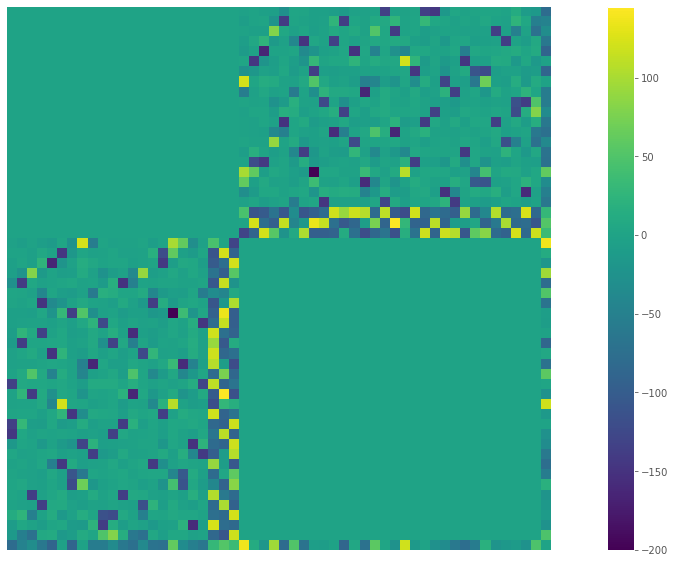

In [7]:
W_f = W_h[-1]
show(W_f,big=True)

-2


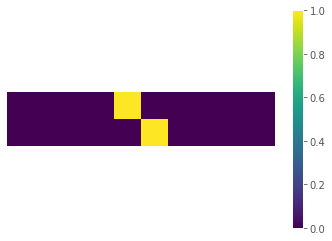

-1


0


1


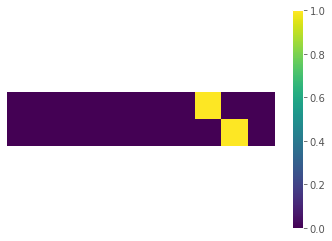

2


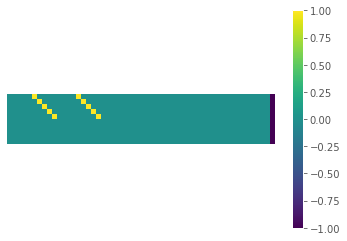

In [8]:
samples = 5
if samples%2 != 0:
    n = int((samples-1)/2)
else:
    n = samples/2 + 1
V = np.zeros((2*samples,54))
V[:,-1] = -1

plot_num = 1
from_pixel = 8
to_pixel = 7
j = 0
for i in range(-n,n+1):
    print(i)
    V_test = np.zeros((2,10))
    V_test[0,(to_pixel+i-1)%10] = 1
    V_test[1,(from_pixel+i-1)%10] = 1
    show(V_test)
    V_test2 = np.flip(V_test,0) # Flip order of V1 and V2
    V[j,0:20] = V_test2.flatten() # Put V1 and V2 into a list
    j+=1
    
show(V)

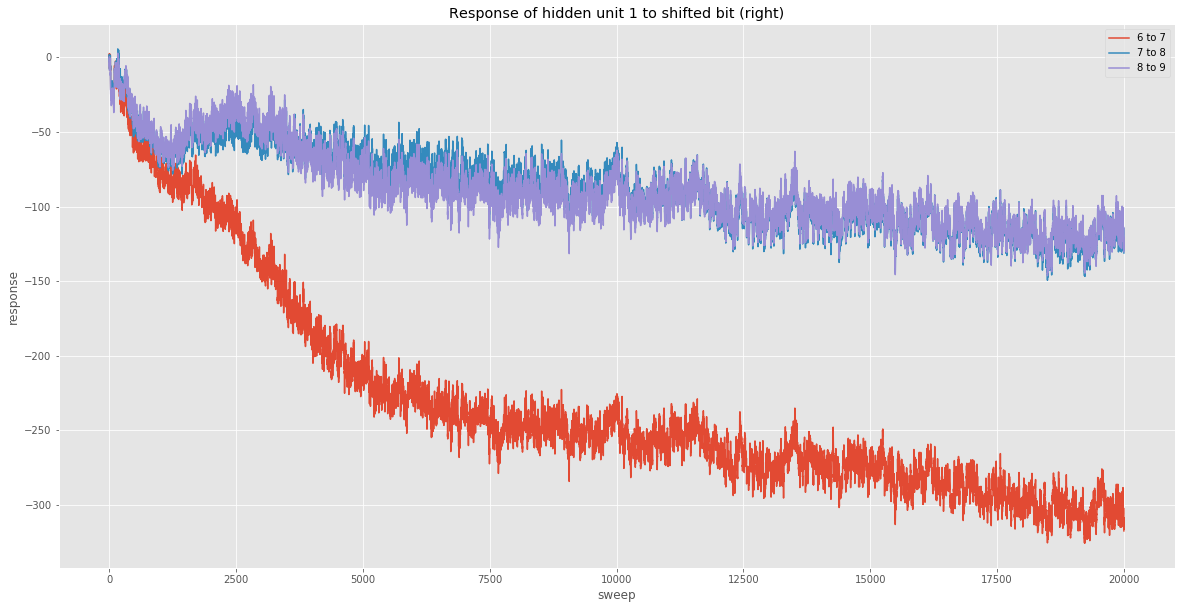

In [28]:
data = {}
n = int((samples-1)/2)
for sample in range(-n,n+1):
    data[sample] = []
    for i in range(W_h.shape[0]):
        temp = np.dot(W_h[i,22+plot_num,:],V[sample+n])
        #temp = 1/(1+np.exp(-temp/50))
        data[sample].append(temp)
        
plt.figure(figsize=(20,10))
for k,v in data.items():
    plt.plot(v,label=str(k+7)+' to '+str(k+8))
plt.xlabel('sweep')
plt.ylabel('response')
plt.title('Response of hidden unit 1 to shifted bit (right)')
plt.legend()
plt.show()

-1


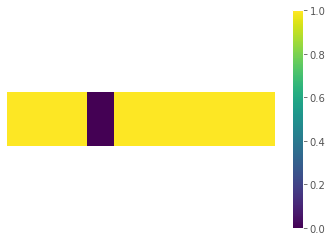

0


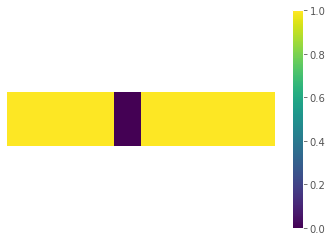

1


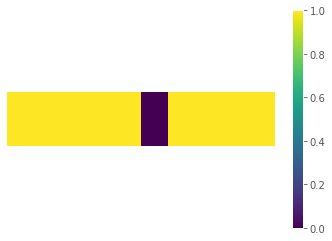

2


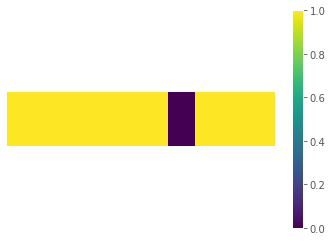

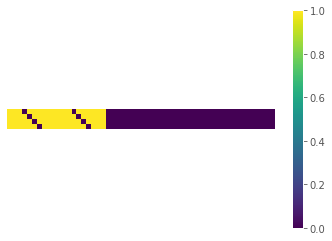

In [10]:
samples = 4
V = np.zeros((samples,54))
V[:,-1] = 0

plot_num = 3
from_pixel = 5
to_pixel = 5
j = 0
for i in range(-1,3,1):
    print(i)
    V_test = np.ones((2,10))
    V_test[0,(to_pixel+i-1)%10] = 0
    V_test[1,(from_pixel+i-1)%10] = 0
    show(V_test)
    V_test2 = np.flip(V_test,0) # Flip order of V1 and V2
    V[j,0:20] = V_test2.flatten() # Put V1 and V2 into a list
    j+=1
show(V)

In [13]:
data = {}
for sample in range(-1,3,1):
    data[sample] = []
    for i in range(W_h.shape[0]):
        temp = np.dot(W_h[i,22+plot_num,:],V[sample+1])
        data[sample].append(temp)

plt.figure(figsize=(20,10))
for k,v in data.items():
    plt.plot(v,label=str(5+k))
plt.xlabel('sweep')
plt.ylabel('response')
plt.title('Response of hidden unit 3 to unshifted void')
plt.legend()
plt.show()

-1


(3, 4)
[(3, 4)]
0


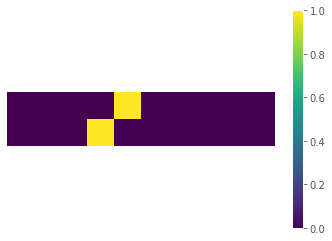

(4, 5)
[(3, 4), (4, 5)]
1


(5, 6)
[(3, 4), (4, 5), (5, 6)]
-1


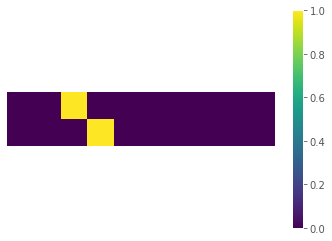

(3, 4)
[(3, 4), (4, 5), (5, 6), (4, 3)]
0


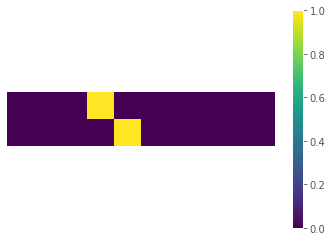

(4, 5)
[(3, 4), (4, 5), (5, 6), (4, 3), (5, 4)]
1


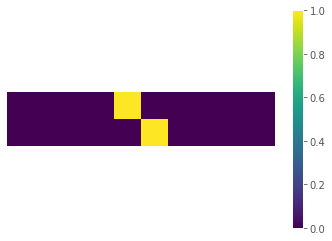

(5, 6)
[(3, 4), (4, 5), (5, 6), (4, 3), (5, 4), (6, 5)]
-1


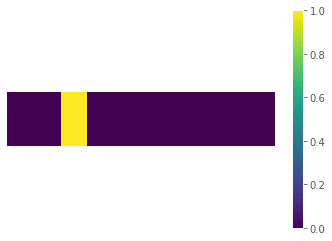

(3, 3)
[(3, 4), (4, 5), (5, 6), (4, 3), (5, 4), (6, 5), (3, 3)]
0


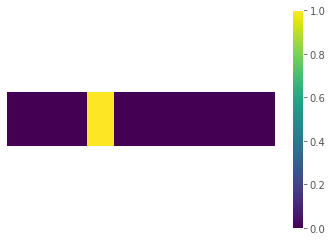

(4, 4)
[(3, 4), (4, 5), (5, 6), (4, 3), (5, 4), (6, 5), (3, 3), (4, 4)]


In [29]:
samples = 8
V = np.zeros((samples,54))
V[:,-1] = -1

plot_num = 7
from_pixel = 4
to_pixel = 5
list_shifts = []

n = 1
j = 0
# canonical shift (3 samples)
for i in range(-n,n+1):
    print(i)
    V_test = np.zeros((2,10))
    V_test[0,(to_pixel+i-1)%10] = 1
    V_test[1,(from_pixel+i-1)%10] = 1
    show(V_test)
    V_test2 = np.flip(V_test,0) # Flip order of V1 and V2
    V[j,0:20] = V_test2.flatten() # Put V1 and V2 into a list
    print((from_pixel+i,to_pixel+i))
    list_shifts.append((from_pixel+i,to_pixel+i))
    print(list_shifts)
    j+=1
# opposite shift (3 samples)
for i in range(-n,n+1):
    print(i)
    V_test = np.zeros((2,10))
    V_test[0,(from_pixel+i-1)%10] = 1
    V_test[1,(to_pixel+i-1)%10] = 1
    show(V_test)
    V_test2 = np.flip(V_test,0) # Flip order of V1 and V2
    V[j,0:20] = V_test2.flatten() # Put V1 and V2 into a list
    print((from_pixel+i,to_pixel+i))
    list_shifts.append((to_pixel+i,from_pixel+i))
    print(list_shifts)
    j+=1
# no shift (2 samples)
for i in range(-1,1):
    print(i)
    V_test = np.zeros((2,10))
    V_test[0,(from_pixel+i-1)%10] = 1
    V_test[1,(from_pixel+i-1)%10] = 1
    show(V_test)
    V_test2 = np.flip(V_test,0) # Flip order of V1 and V2
    V[j,0:20] = V_test2.flatten() # Put V1 and V2 into a list
    print((from_pixel+i,from_pixel+i))
    list_shifts.append((from_pixel+i,from_pixel+i))
    print(list_shifts)
    j+=1
    
show(V)

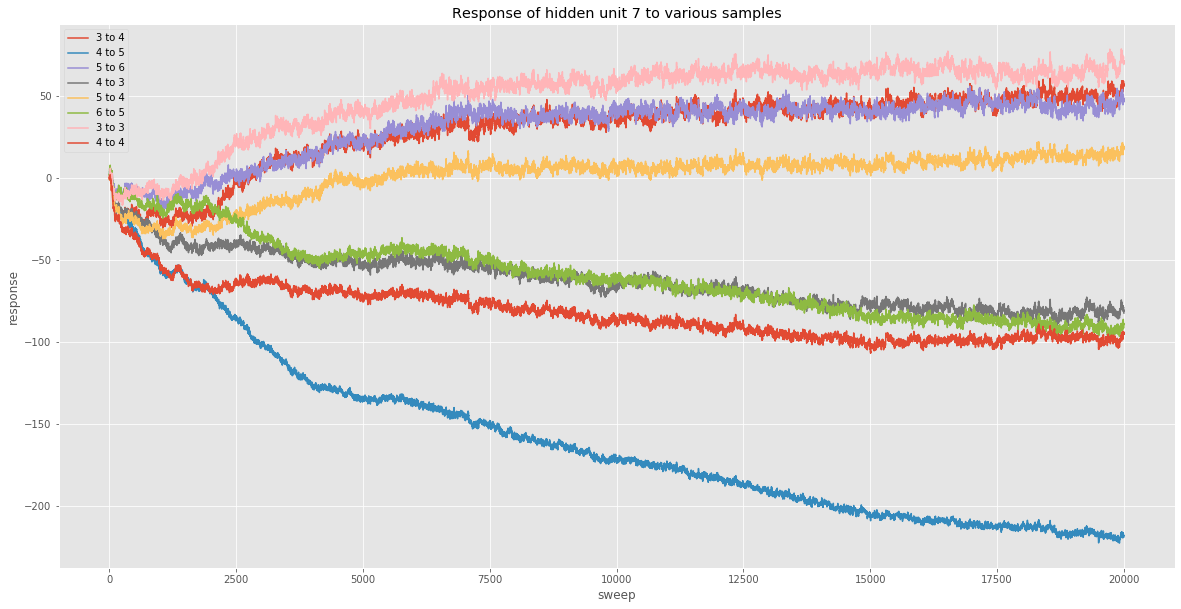

In [34]:
data = {}
for sample in range(samples):
    data[sample] = []
    for i in range(W_h.shape[0]):
        temp = np.dot(W_h[i,22+plot_num,:],V[sample])
#         temp = 1/(1+np.exp(-temp/20))
        data[sample].append(temp)
        
plt.figure(figsize=(20,10))
for k,v in data.items():
    plt.plot(v,label=str(list_shifts[k][0])+' to '+str(list_shifts[k][1]))

plt.xlabel('sweep')
plt.ylabel('response')
plt.title('Response of hidden unit '+str(plot_num)+' to various samples')
plt.legend()
plt.show()